In [1]:
import torch
from torch import tensor, float32
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt


### A hand-knitted Learner (included in Keras and fastai, not in Pytorch)

In [2]:
class Learner(object):
    def __init__(self, M, optimizer, loss_fct, pred_fct, n_epoch):
        self.M = M
        self.optimizer = optimizer
        self.loss_fct = loss_fct
        self.pred_fct = pred_fct
        self.n_epoch = n_epoch

    def fit(self, X, Y):
        cnt = 0
        history = []

        while cnt < self.n_epoch:
            loss = self.loss_fct(self.M(X), Y)
            history.append(loss.item())
            loss.backward()
            self.optimizer.step()
            self.optimizer.zero_grad()
            cnt += 1

        return history

    def predict(self, X):
        return self.pred_fct(self.M(X))

### Regressor with mean square error loss

In [3]:
# X = Input (4 x 2)
# Y = Output  (4 x 1)

def prepare21(x, y, lr, n_epoch):
   
    X = tensor(x, requires_grad=True, dtype=float32).view(-1, 2)
    Y = tensor(y, dtype=torch.float32).view(-1, 1)
    M = nn.Sequential(nn.Linear(2, 5), nn.Sigmoid(), nn.Linear(5,1))

    # d = {'0.weight': torch.tensor([[1., 1.]]),
    #      '0.bias': torch.tensor([0.0])}
    # M.load_state_dict(d)

    optimizer = optim.Adam(M.parameters(), lr=lr)
    loss_fct = nn.MSELoss()
    # pred = Y rounded to nearest integer with gradient removed (detach)
    pred_fct = lambda Y: torch.round(Y).detach()

    return Learner(M, optimizer, loss_fct, pred_fct, n_epoch), X, Y

### Classifier with binary cross entropy loss

In [4]:
# X = Input (4 x 2)
# Y = Output  (4 x 1)

def prepare21a(x, y, lr, n_epoch):
   
    X = tensor(x, requires_grad=True, dtype=float32).view(-1, 2)
    Y = tensor(y, dtype=torch.float32).view(-1, 1)
    M = nn.Sequential(nn.Linear(2, 5), nn.Sigmoid(), nn.Linear(5,1))

    optimizer = optim.Adam(M.parameters(), lr=lr)
    loss_fct = nn.BCEWithLogitsLoss()
    # pred = 1 if Y > 0, otherwise 0
    pred_fct = lambda Y: torch.heaviside(Y, torch.zeros(1))

    return Learner(M, optimizer, loss_fct, pred_fct, n_epoch), X, Y

### Classifier with cross entropy loss

In [5]:
# X = Input (4 x 2)
# Y = Output  (4)

def prepare22(x, y, lr, n_epoch):
    X = tensor(x, requires_grad=True, dtype=float32).view(-1, 2)
    Y = tensor(y, dtype=torch.long)
    M = nn.Sequential(nn.Linear(2, 5), nn.Sigmoid(), nn.Linear(5,2))

    optimizer = optim.Adam(M.parameters(), lr=lr)
    loss_fct = nn.CrossEntropyLoss()
    # pred = index of max value on each row (always 0 or 1)
    pred_fct = lambda Y: torch.argmax(Y, dim=1).view(-1, 1)

    return Learner(M, optimizer, loss_fct, pred_fct, n_epoch), X, Y

In [6]:
def showProgress(history, label):
    plt.plot(history, label=label)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.ylabel('loss')
    plt.xlabel('iterations')


 AND
Errors in prepare21 : 0
Errors in prepare21a: 0
Errors in prepare22 : 0

 OR
Errors in prepare21 : 0
Errors in prepare21a: 0
Errors in prepare22 : 0

 XOR
Errors in prepare21 : 0
Errors in prepare21a: 0
Errors in prepare22 : 0


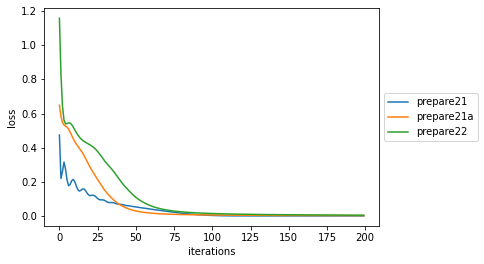

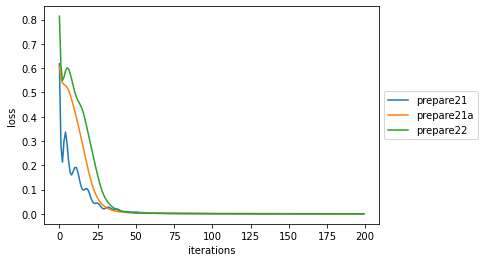

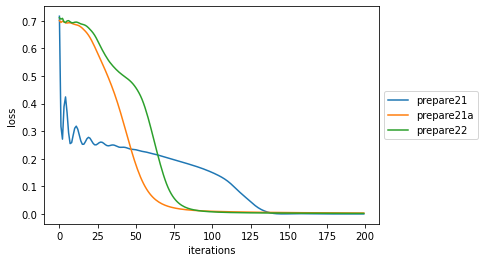

In [7]:
x = (0, 0, 0, 1, 1, 0, 1, 1)
y_and = (0, 0, 0, 1)
y_or = (0, 1, 1, 1)
y_xor = (0, 1, 1, 0)

dict = {'AND': y_and, 'OR': y_or, 'XOR': y_xor}

lr = 0.1
n_epoch = 200

for op, y in dict.items():
    print('\n', op)
    plt.figure()
    for prep in (prepare21, prepare21a, prepare22):
        learner, X, Y = prep(x, y, lr, n_epoch)
        history = learner.fit(X, Y)
        showProgress(history, prep.__name__)

        Y_pred = learner.predict(X)
        diff = Y_pred - Y.view(-1, 1)
        print(f'Errors in {prep.__name__ :10}: {len(diff[diff != 0])}')
